<h1><center>Emissions Dataset ETL and EDA</center></h1>

<h4>Initial Question:</h4>
<p>Looking at the top 10 countries by GDP, what pollutants are most prevelant?</p>

<p>1. Imports</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<p>2. Reading in the data</p>

In [2]:
emissions = pd.read_csv('2002-2021-emissions.csv')
gdp = pd.read_csv('gdp.csv')

<p>3. Creating a Pandas DataFrame with the data</p>

In [3]:
merged_data = pd.merge(emissions, gdp, on="Country")
merged_data_2020 = merged_data.query("Year == 2020")
df = merged_data_2020.nlargest(10, 'GDP')

<h3><center>Descrpitive Statistics on initial DataFrame (Top 10 countries by GDP)</center></h3>

In [4]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,GDP
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.000000e+01
mean,2020.0,2168.426460,1084.265668,587.508899,351.243442,110.530686,11.901669,25.528995,6.995141,5.760910e+12
std,0.0,3390.947014,2347.353967,681.124617,491.047201,265.113013,20.513606,55.219075,4.345595,6.618618e+12
min,2020.0,280.031523,22.269892,127.283580,59.026096,3.899688,0.344529,2.049271,1.750956,1.444730e+12
25%,2020.0,355.273900,29.878988,182.933179,130.926724,6.733329,2.117130,2.752660,4.473508,2.074112e+12
50%,2020.0,587.122419,126.799242,266.236677,158.524090,17.705089,3.124296,6.392000,6.376618,2.710025e+12
75%,2020.0,2094.314960,759.071401,549.665957,223.440763,36.638377,13.322439,7.838883,8.163361,4.754922e+12
max,2020.0,10956.213370,7605.716883,2049.336500,1653.677852,858.232613,67.684371,171.538883,14.116709,2.095300e+13


<h3><center> Top 10 countries by GDP and their pollutant counts (2020) </center></h3>

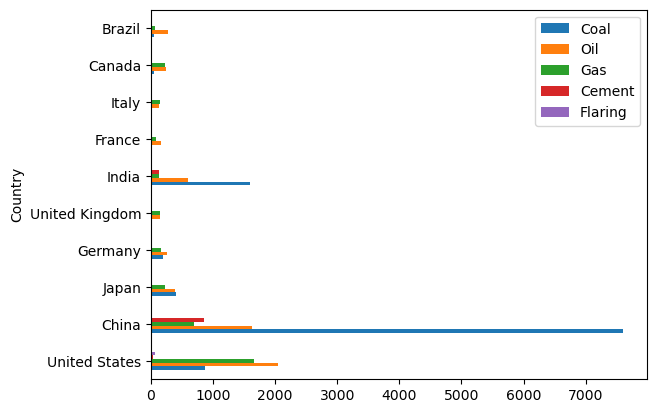

In [5]:
df.plot.barh(x="Country", y=["Coal", "Oil", "Gas", "Cement", "Flaring"]);

<h3><center>Removing coal for a better visualization </center></h3>

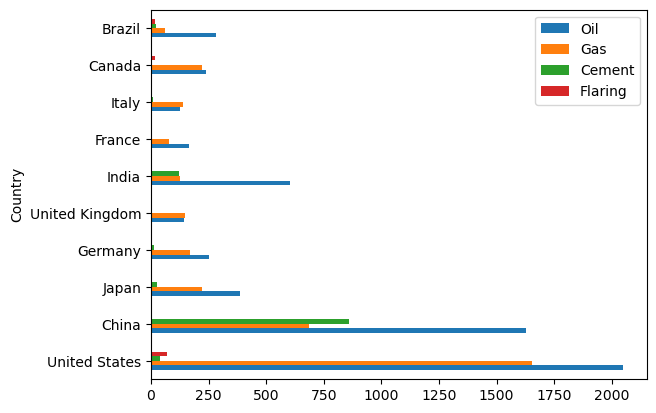

In [6]:
df.plot.barh(x="Country", y=["Oil", "Gas", "Cement", "Flaring"]);

In [7]:
top_10_excluding_usa_china_india = merged_data_2020.query("Country not in ('United States','China', 'India')").sort_values(by='GDP', ascending=False).head(10)

<h3><center>Removing China, USA and India to help show other countires pollutant levels</center></h3>

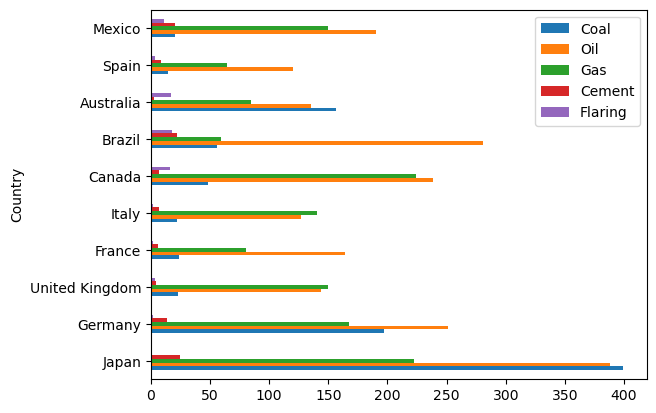

In [8]:
top_10_excluding_usa_china_india.plot.barh(x="Country", y=["Coal", "Oil", "Gas", "Cement", "Flaring"]);

<h3><center>Drilling down into USA, China and India over the years</center></h3>

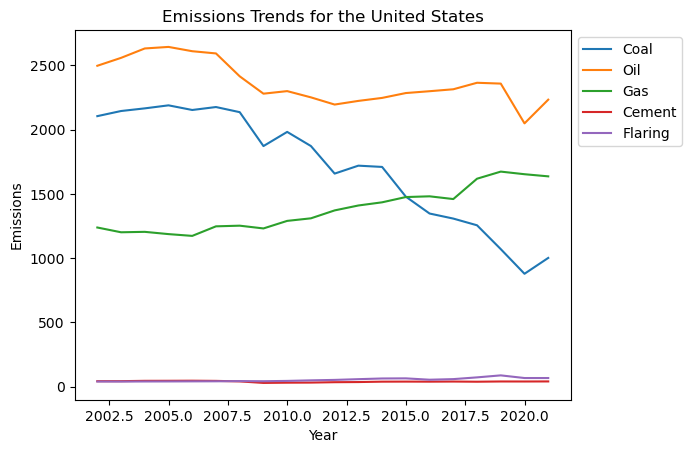

In [9]:
us_df = merged_data[merged_data['Country'] == 'United States']

# Create the line chart
plt.plot(us_df['Year'], us_df['Coal'], label='Coal')
plt.plot(us_df['Year'], us_df['Oil'], label='Oil')
plt.plot(us_df['Year'], us_df['Gas'], label='Gas')
plt.plot(us_df['Year'], us_df['Cement'], label='Cement')
plt.plot(us_df['Year'], us_df['Flaring'], label='Flaring')

# Add a legend and labels
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Trends for the United States')

# Show the chart
plt.show()

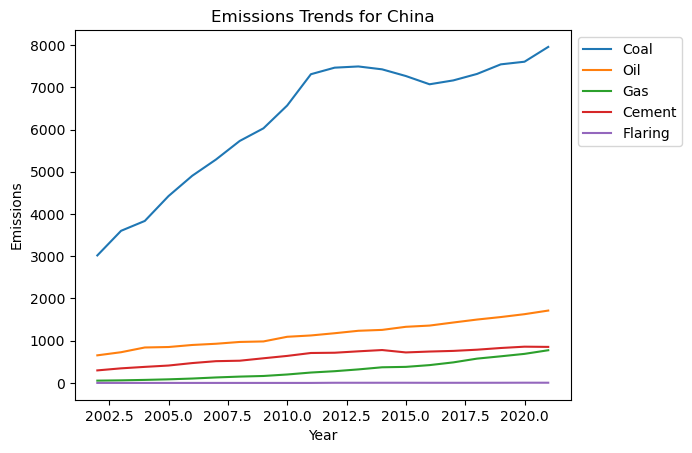

In [10]:
china_df = merged_data[merged_data['Country'] == 'China']

# Create the line chart
plt.plot(china_df['Year'], china_df['Coal'], label='Coal')
plt.plot(china_df['Year'], china_df['Oil'], label='Oil')
plt.plot(china_df['Year'], china_df['Gas'], label='Gas')
plt.plot(china_df['Year'], china_df['Cement'], label='Cement')
plt.plot(china_df['Year'], china_df['Flaring'], label='Flaring')

# Add a legend and labels
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Trends for China')

# Show the chart
plt.show()

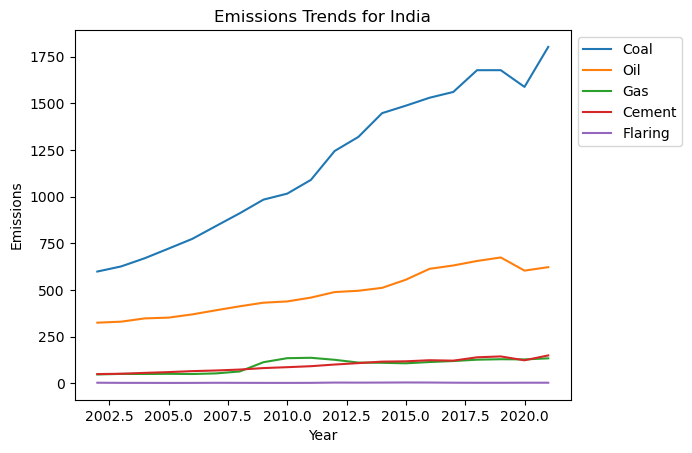

In [11]:
india_df = merged_data[merged_data['Country'] == 'India']

# Create the line chart
plt.plot(india_df['Year'], india_df['Coal'], label='Coal')
plt.plot(india_df['Year'], india_df['Oil'], label='Oil')
plt.plot(india_df['Year'], india_df['Gas'], label='Gas')
plt.plot(india_df['Year'], india_df['Cement'], label='Cement')
plt.plot(india_df['Year'], india_df['Flaring'], label='Flaring')

# Add a legend and labels
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Trends for India')

# Show the chart
plt.show()

In [12]:
emissions_2020 = emissions.query("Year == 2020")

In [13]:
population = pd.read_csv('world_population.csv')

In [14]:
new_merge = pd.merge(emissions_2020, population, on="Country")

In [20]:
merge3 = pd.merge(emissions, population, on='Country')

In [15]:
df2 = new_merge.nlargest(10, '2020 Population')

<h3><center>Descriptive statistics on Emissions and Population dataset </center></h3>

In [16]:
df2.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,2020 Population
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,10.000000,1.000000e+01
mean,2020.0,2161.632218,1089.056965,548.760720,369.693436,114.119202,18.041082,54.902032,4.415102,4.516874e+08
std,0.0,3414.940350,2345.514720,708.139471,527.877056,263.652798,24.612056,78.141722,4.821859,5.090789e+08
min,2020.0,90.825300,0.132916,15.923472,37.571966,1.473934,0.027899,6.392000,0.542497,1.259983e+08
25%,2020.0,255.714498,29.068507,100.310970,61.625407,18.378924,2.985736,13.857119,1.132238,1.776476e+08
50%,2020.0,526.046065,178.864042,241.834190,101.298129,21.351506,7.980440,20.838623,2.158837,2.201965e+08
75%,2020.0,2239.814314,750.919318,547.909949,553.291857,37.566674,16.510240,61.883536,6.543918,3.199210e+08
max,2020.0,10956.213370,7605.716883,2049.336500,1653.677852,858.232613,67.684371,171.538883,14.037218,1.424930e+09


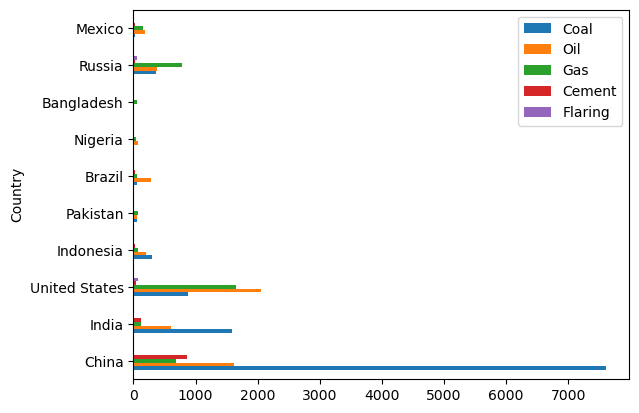

In [17]:
df2.plot.barh(x="Country", y=["Coal", "Oil", "Gas", "Cement", "Flaring"]);

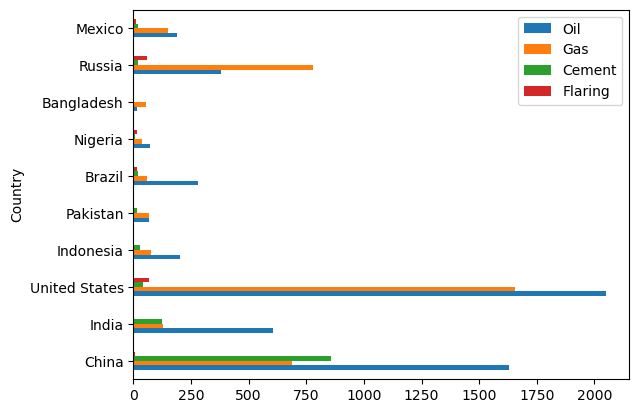

In [18]:
df2.plot.barh(x="Country", y=["Oil", "Gas", "Cement", "Flaring"]);